In [1]:
import plotly.offline as py
from plotly.graph_objs import *
import pandas as pd
import math
py.init_notebook_mode()

In [2]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import animation
from matplotlib.patches import Ellipse
import math
%matplotlib inline

# Load UKF output files

In [3]:
path = './cmake-build-debug'

In [4]:
my_cols=['t',
         'px_gt','py_gt','vx_gt','vy_gt',
         'px_est','py_est','vx_est','vy_est',
         'px_meas','py_meas',
         'NIS',
         'v', 'psi', 'psid',
         'sigx','sigy','anglexy',
         'sigx_pr','sigy_pr','anglexy_pr'
        ]
with open(path+'/output-1.txt') as f:
    table_ekf_output1 = pd.read_table(f, sep='\t', header=None, names=my_cols, lineterminator='\n', index_col=False)
    
with open(path+'/output-2.txt') as f:
    table_ekf_output2 = pd.read_table(f, sep='\t', header=None, names=my_cols, lineterminator='\n', index_col=False)


In [5]:
table_ekf_output1

,t,px_gt,py_gt,vx_gt,vy_gt,px_est,py_est,vx_est,vy_est,px_meas,...,NIS,v,psi,psid,sigx,sigy,anglexy,sigx_pr,sigy_pr,anglexy_pr
0,0.000000,8.60,2.500000e-01,-3.000290,0.000000,8.46292,0.243462,0.000000,0.000000e+00,8.46292,...,6.953230e-310,0.000000,0.000000e+00,0.000000e+00,0.022500,0.022500,0.000000e+00,0.022500,0.022500,0.000000e+00
1,0.049996,8.45,2.500000e-01,-3.000270,0.000000,8.45550,0.247508,-0.001953,2.223340e-20,8.44818,...,6.252640e-03,-0.001953,-1.138410e-17,-1.385060e-34,0.011318,0.011250,4.479420e-28,0.022775,0.022500,4.481200e-28
2,0.100053,8.45,2.500000e-01,0.000000,0.000000,8.46779,0.246572,-0.003689,-4.433560e-09,8.56759,...,1.240770e-01,-0.003689,1.201940e-06,1.030000e-07,0.010233,0.009578,-1.936160e-02,0.011991,0.011250,5.169990e-21
3,0.150110,8.45,2.500000e-01,0.000000,0.000000,8.46381,0.248786,-0.006259,3.078310e-08,8.45582,...,5.905550e-03,-0.006259,-4.918210e-06,-5.726720e-07,0.007266,0.006718,-1.115290e-02,0.010733,0.009578,-1.115290e-02
4,0.205061,8.35,2.500000e-01,-1.819790,0.000000,8.37648,0.249241,-1.151770,-1.226370e-04,8.42544,...,1.453320e+01,-1.151770,1.064770e-04,2.527590e-05,0.006980,0.006085,-1.182410e-02,0.008139,0.006718,-4.334320e-03
5,0.260013,8.25,2.500000e-01,-1.819780,0.000000,8.29694,0.249197,-1.173350,-1.317370e-04,8.23962,...,1.957110e-01,-1.173350,1.122750e-04,2.645920e-05,0.005711,0.005025,-8.999920e-03,0.007654,0.006471,-8.999920e-03
6,0.310016,8.05,2.000000e-01,-3.999760,-0.999940,8.08695,0.239602,-2.782270,-1.413690e-01,7.93286,...,3.096750e+01,-2.785860,5.076680e-02,1.460120e-02,0.005589,0.005418,5.031010e-02,0.006638,0.005946,-8.549720e-03
7,0.360020,7.85,1.500000e-01,-3.999720,-0.999930,7.93059,0.210813,-2.803680,-2.911850e-01,7.84073,...,6.227610e-01,-2.818760,1.034870e-01,2.938620e-02,0.006999,0.004903,-1.624060e+00,0.010158,0.006269,-1.624060e+00
8,0.410023,7.70,1.500000e-01,-2.999820,0.000000,7.75819,0.201812,-3.132070,-2.339890e-01,7.61269,...,1.572180e+00,-3.140800,7.456880e-02,1.636080e-02,0.010681,0.004871,-1.598320e+00,0.013497,0.005839,-1.648720e+00
9,0.460026,7.55,1.500000e-01,-2.999820,0.000000,7.59476,0.176334,-3.149240,-3.152290e-01,7.54016,...,1.869570e-01,-3.164980,9.976460e-02,2.490060e-02,0.010566,0.004443,-1.601200e+00,0.019920,0.005536,-1.601200e+00


In [6]:
table_ekf_output2

,t,px_gt,py_gt,vx_gt,vy_gt,px_est,py_est,vx_est,vy_est,px_meas,...,NIS,v,psi,psid,sigx,sigy,anglexy,sigx_pr,sigy_pr,anglexy_pr
0,0,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.00000,...,6.953240e-310,0.00000,0.000000e+00,0.000000e+00,0.022500,0.022500,0.000000e+00,0.022500,0.022500,0.000000e+00
1,0,0.00000,0.000000,0.00000,0.000000,0.259524,0.000000,0.000000,0.000000e+00,0.00000,...,3.282440e+00,0.00000,0.000000e+00,0.000000e+00,0.022500,0.000025,1.570800e+00,0.022500,0.022500,0.000000e+00
2,1,2.09897,0.052223,2.19595,0.109339,1.514760,-0.069251,1.787450,9.627430e-18,1.55945,...,3.008000e+00,1.78745,5.386130e-18,-1.978420e-18,0.021726,0.011250,6.793740e-18,0.632025,0.022500,6.793740e-18
3,1,2.09897,0.052223,2.19595,0.109339,1.603850,0.019868,2.332510,-3.692060e-02,1.81209,...,2.258120e+00,2.33280,-1.582740e-02,-9.110380e-03,0.016473,0.001763,4.397800e-02,0.021726,0.011250,-1.421640e-30
4,2,4.29136,0.215312,2.28434,0.226323,3.879320,-0.131405,2.787600,-3.158170e-01,3.89093,...,2.068820e-01,2.80543,-1.128120e-01,-4.788920e-02,0.022141,0.021802,-1.461850e+00,1.386700,0.702446,-1.461850e+00
5,2,4.29136,0.215312,2.28434,0.226323,3.932070,0.073265,2.495190,4.819220e-02,4.19528,...,4.335450e+00,2.49566,1.931160e-02,4.962070e-03,0.016742,0.008424,3.619810e-02,0.022141,0.021802,-1.461850e+00
6,3,6.56942,0.496096,2.36382,0.348847,6.844940,0.402242,3.168180,6.117510e-01,6.86352,...,6.334010e-01,3.22670,1.907450e-01,1.243310e-01,0.021732,0.021435,7.722440e-02,0.636994,0.452840,7.722440e-02
7,3,6.56942,0.496096,2.36382,0.348847,6.738820,0.433334,2.530810,5.572080e-01,6.43926,...,2.276270e+00,2.59143,2.167120e-01,1.480070e-01,0.016510,0.014211,-1.081610e-01,0.021732,0.021435,7.722440e-02
8,4,8.92437,0.899240,2.43359,0.474526,9.075910,0.621494,2.266580,2.371780e-01,9.07733,...,7.084450e-01,2.27896,1.042620e-01,-2.597460e-02,0.021728,0.021288,-4.097420e-01,0.633422,0.395239,-4.097420e-01
9,4,8.92437,0.899240,2.43359,0.474526,9.053560,0.685106,2.480500,3.437120e-01,8.89749,...,1.199280e+00,2.50420,1.376890e-01,-2.830200e-03,0.016626,0.016401,-2.260480e+00,0.021728,0.021288,-4.097420e-01


# Draw static pics 'A La Mercedes'

In [7]:
#estimations
trace11 = Scatter(
    x=table_ekf_output1['px_est'],
    y=table_ekf_output1['py_est'],
    xaxis='x2',
    yaxis='y2',
    name='UKF-Estimate'
)
#estimations
trace12 = Scatter(
    x=table_ekf_output2['px_est'],
    y=table_ekf_output2['py_est'],
    xaxis='x2',
    yaxis='y2',
    name='UKF-Estimate'
)

#Measurements
trace21 = Scatter(
    x=table_ekf_output1['px_meas'],
    y=table_ekf_output1['py_meas'],
    xaxis='x2',
    yaxis='y2',
    name = 'Measurements',
    mode = 'markers'
)
#Measurements
trace22 = Scatter(
    x=table_ekf_output2['px_meas'],
    y=table_ekf_output2['py_meas'],
    xaxis='x2',
    yaxis='y2',
    name = 'Measurements',
    mode = 'markers'
)

#Measurements
trace31 = Scatter(
    x=table_ekf_output1['px_gt'],
    y=table_ekf_output1['py_gt'],
    xaxis='x2',
    yaxis='y2',
    name = 'Ground Truth'
)
#Measurements
trace32 = Scatter(
    x=table_ekf_output2['px_gt'],
    y=table_ekf_output2['py_gt'],
    xaxis='x2',
    yaxis='y2',
    name = 'Ground Truth'
)

data1 = [trace11, trace21, trace31]
data2 = [trace12, trace22, trace32]

layout = Layout(
    xaxis2=dict(
        anchor='x2',
        title='px'
    ),
    yaxis2=dict(
    
        anchor='y2',
        title='py'
    )
)

fig1 = Figure(data=data1, layout=layout)
fig2 = Figure(data=data2, layout=layout)
py.plot(fig1, filename= 'UKF_data1.html');
py.plot(fig2, filename= 'UKF_data2.html');

# Run some data analysis

## Data Set 1

In [8]:
# errors in distance ground truth/UKF estimates
errdist = np.sqrt((table_ekf_output1.px_gt-table_ekf_output1.px_est)*(table_ekf_output1.px_gt-table_ekf_output1.px_est)\
                  +(table_ekf_output1.py_gt-table_ekf_output1.py_est)*(table_ekf_output1.py_gt-table_ekf_output1.py_est))

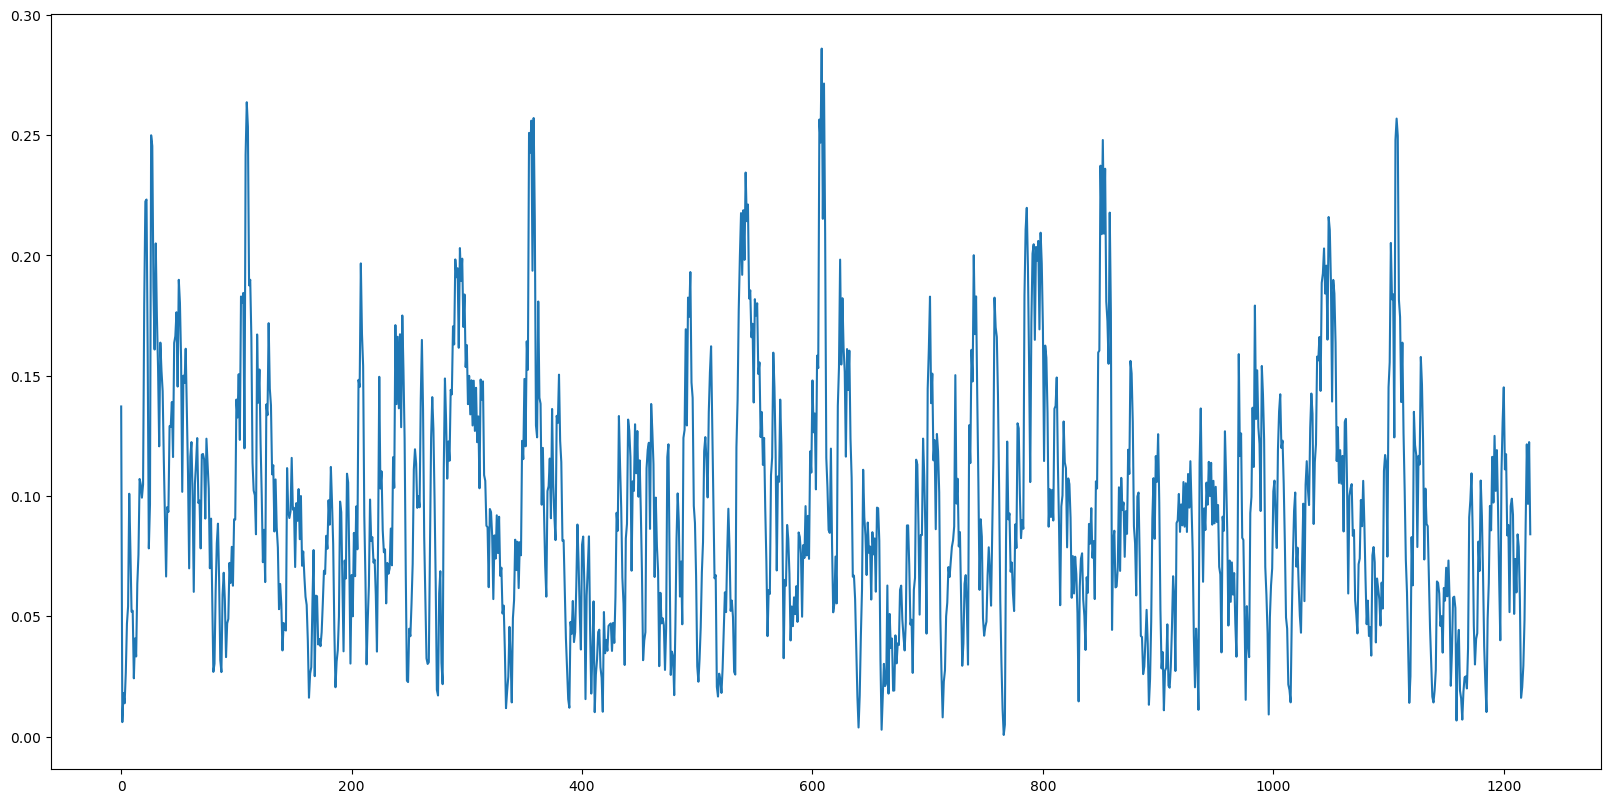

In [9]:
plt.plot(errdist);

In [10]:
# mean squared error in distance
sum(errdist)/len(errdist)

0.09417538164358806

In [11]:
# mean squared error in distance. ignoring first few steps of UKF. does it change?
sum(errdist[35:])/len(errdist[35:])

0.093700448540824738

In [12]:
# calculate prior and posterior uncertainty
p_est_prior = np.sqrt(table_ekf_output1.sigx_pr*table_ekf_output1.sigx_pr+table_ekf_output1.sigy_pr*table_ekf_output1.sigy_pr)
p_est_post = np.sqrt(table_ekf_output1.sigx*table_ekf_output1.sigx+table_ekf_output1.sigy*table_ekf_output1.sigy)

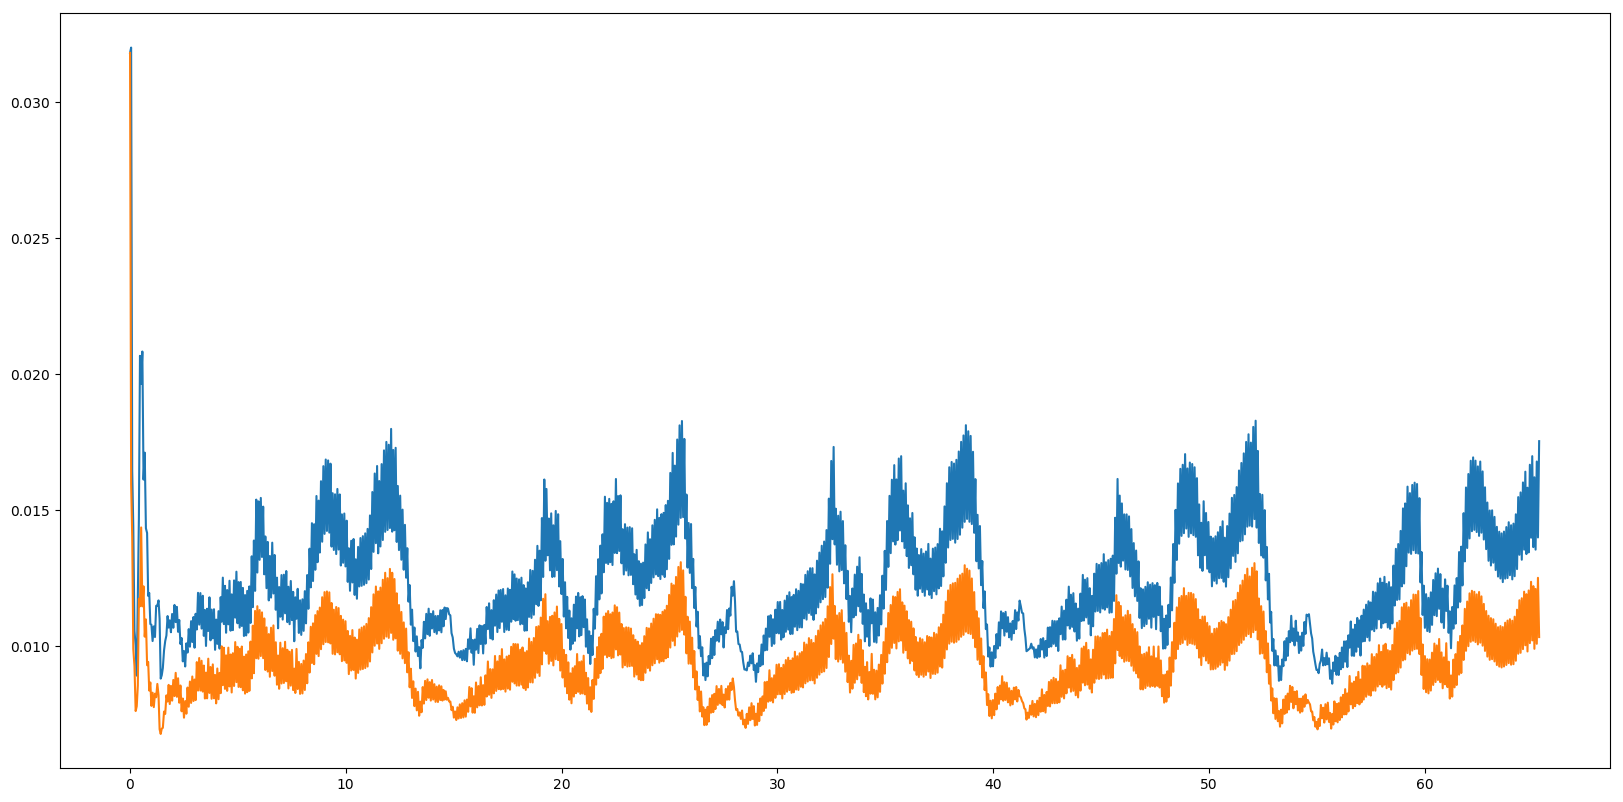

In [13]:
# does measurement update decrease uncertainty?
plt.plot(table_ekf_output1.t, p_est_prior, table_ekf_output1.t, p_est_post);

## Data Set 2

In [14]:
# errors in distance ground truth/UKF estimates
errdist = np.sqrt((table_ekf_output2.px_gt-table_ekf_output2.px_est)*(table_ekf_output2.px_gt-table_ekf_output2.px_est)\
                  +(table_ekf_output2.py_gt-table_ekf_output2.py_est)*(table_ekf_output2.py_gt-table_ekf_output2.py_est))

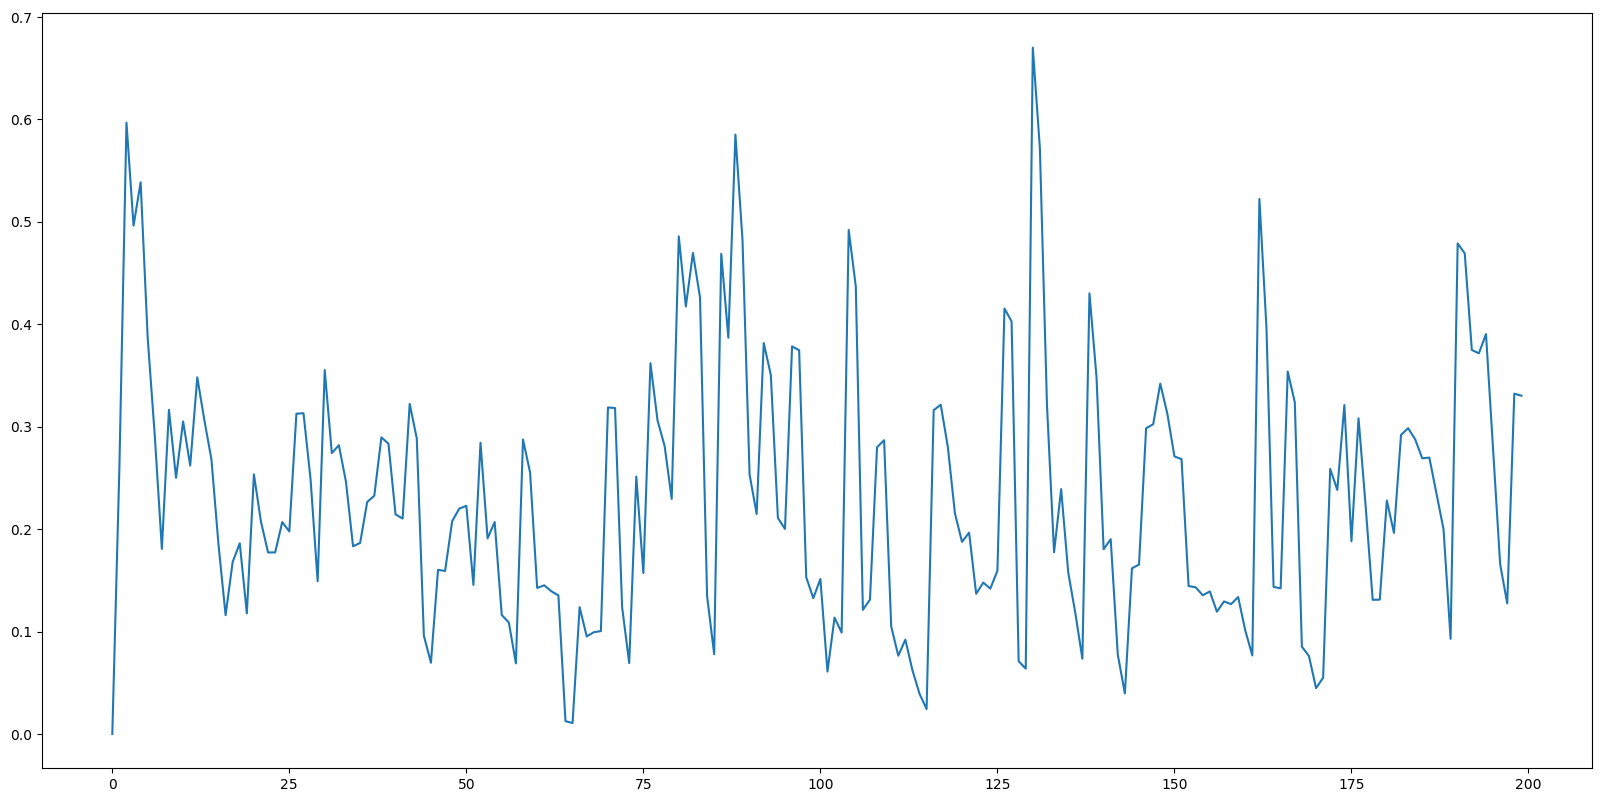

In [15]:
plt.plot(errdist);

In [16]:
# mean squared error in distance
sum(errdist)/len(errdist)

0.2321884854188562

In [17]:
# mean squared error in distance. ignoring first few steps of UKF. does it change?
sum(errdist[35:])/len(errdist[35:])

0.22592199997131754

In [18]:
# calculate prior and posterior uncertainty
p_est_prior = np.sqrt(table_ekf_output2.sigx_pr*table_ekf_output2.sigx_pr+table_ekf_output2.sigy_pr*table_ekf_output2.sigy_pr)
p_est_post = np.sqrt(table_ekf_output2.sigx*table_ekf_output2.sigx+table_ekf_output2.sigy*table_ekf_output2.sigy)

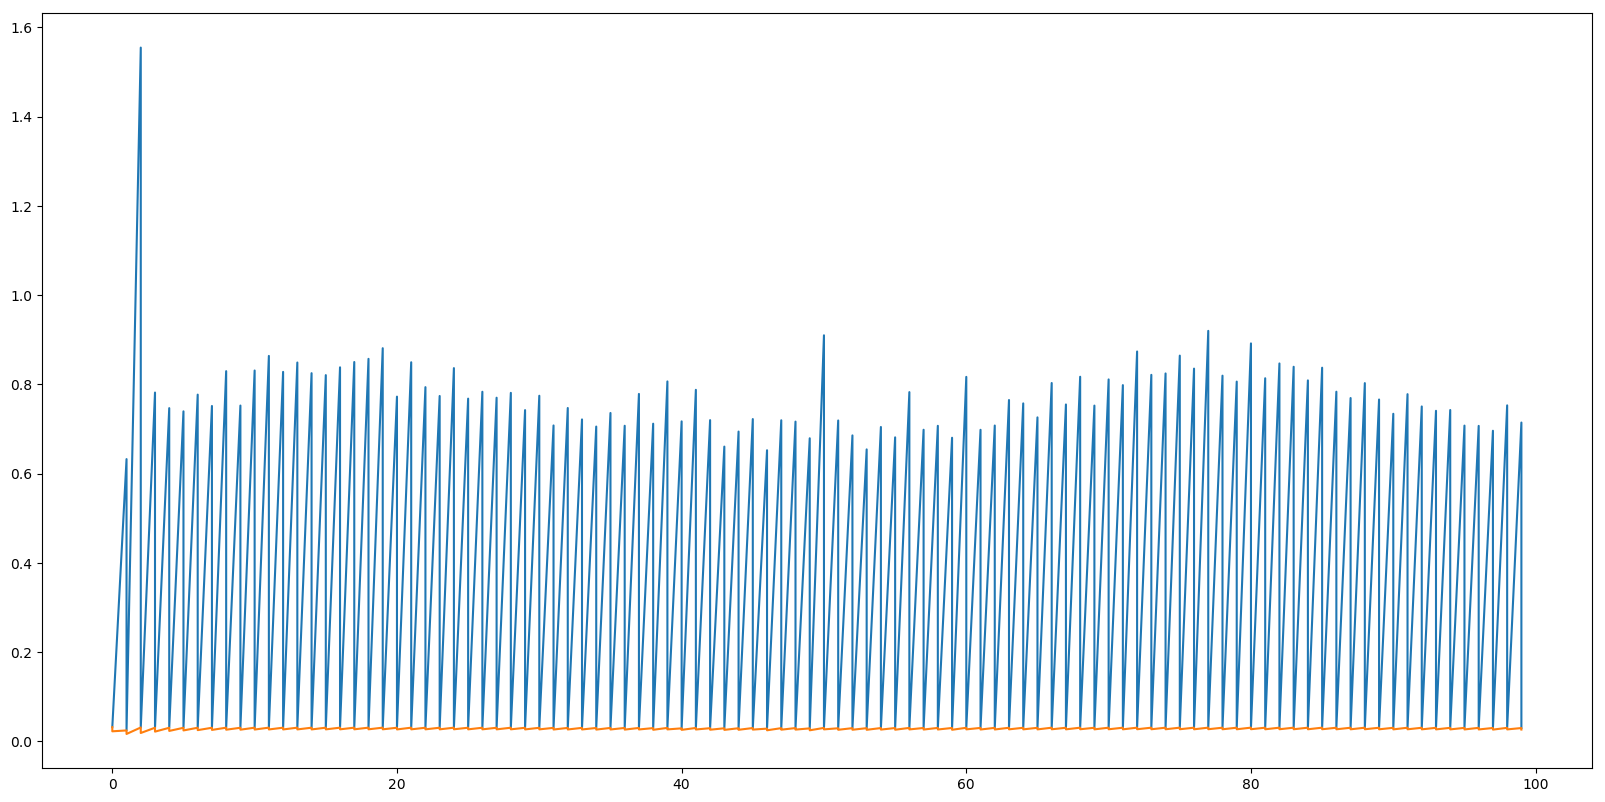

In [19]:
# does measurement update decrease uncertainty?
plt.plot(table_ekf_output2.t, p_est_prior, table_ekf_output2.t, p_est_post);

# Draw animation in time to see what actually happens

## Data Set 1

In [20]:
N = len(table_ekf_output1)

In [21]:
N

1224

In [22]:
t = table_ekf_output1.t
xGT = table_ekf_output1.px_gt.values
yGT = table_ekf_output1.py_gt.values
vxGT = table_ekf_output1.vx_gt.values
vyGT = table_ekf_output1.vy_gt.values

xMES = table_ekf_output1.px_meas.values
yMES = table_ekf_output1.py_meas.values

xEST = table_ekf_output1.px_est.values
yEST = table_ekf_output1.py_est.values
vxEST = table_ekf_output1.vx_est.values
vyEST = table_ekf_output1.vy_est.values
# posterior uncertainty
sigxEST = table_ekf_output1.sigx.values
sigyEST = table_ekf_output1.sigy.values
angleEST = table_ekf_output1.anglexy.values
# prior uncertainty
sigxEST_pr = table_ekf_output1.sigx_pr.values
sigyEST_pr = table_ekf_output1.sigy_pr.values
angleEST_pr = table_ekf_output1.anglexy_pr.values

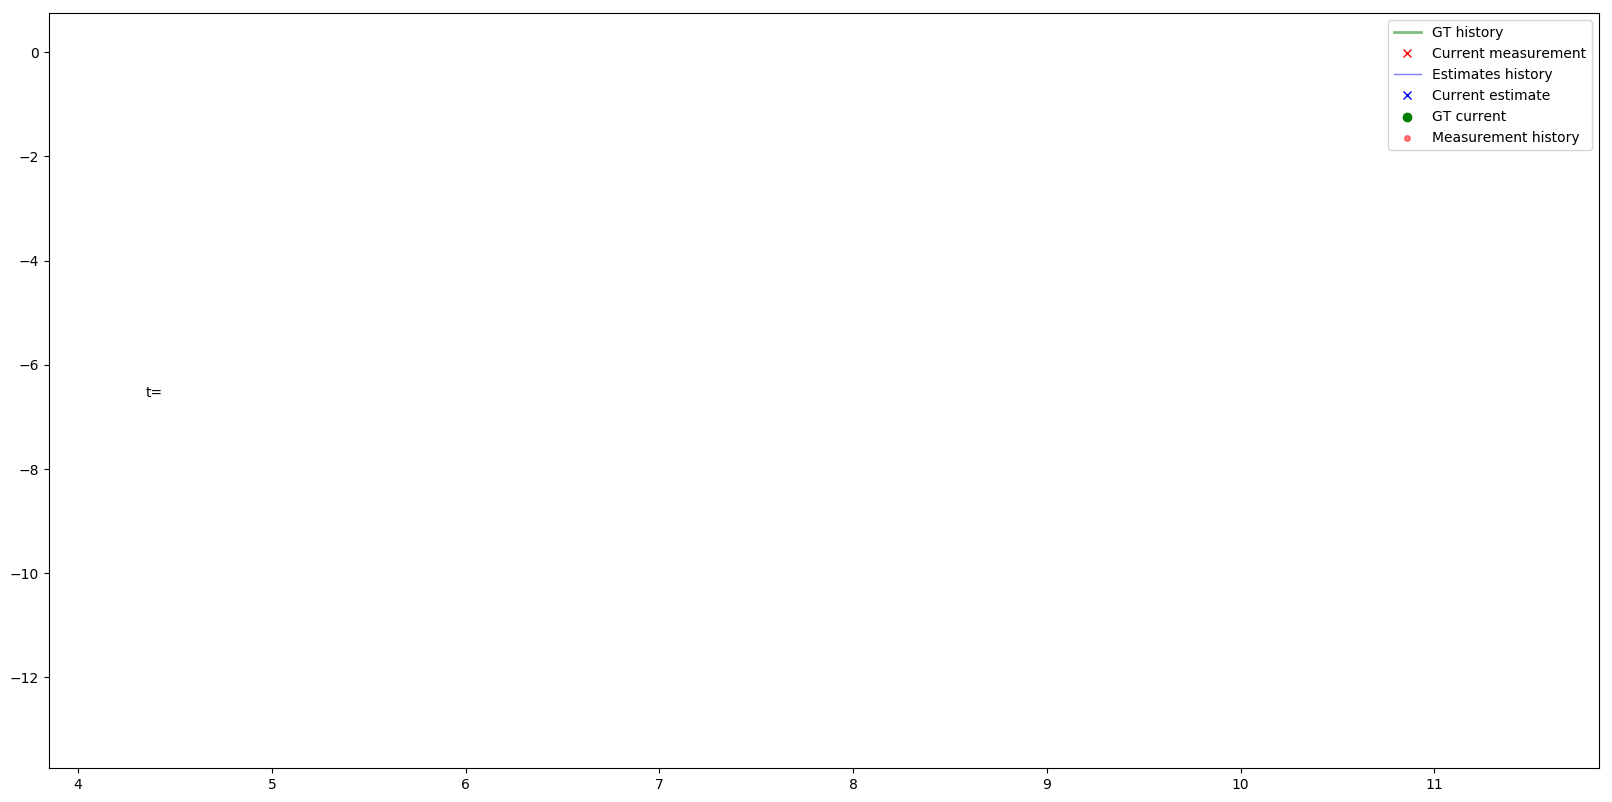

In [23]:
# First set up the figure, the axis, and the plot element we want to animate
fig = plt.figure();
padding = 0.5
ax = plt.axes(xlim=(min(xGT)-padding, max(xGT)+padding), ylim=(min(yGT)-padding, max(yGT)+padding));
textTime = ax.text(min(xGT), sum(yGT)/len(yGT), 't=')
lineGT, = ax.plot([], [], 'g', lw=2, alpha=0.5, label='GT history');
pointGT = ax.scatter([],[],   s=36, c='g', alpha=1,   label='GT current');
lineMES = ax.scatter([], [], s=16, c='r', alpha=0.5, label='Measurement history');
pointMES, = ax.plot([],[], 'rx', lw=7, label='Current measurement');
lineEST, = ax.plot([], [], 'b', lw=1, alpha=0.5, label='Estimates history');
pointEST, = ax.plot([],[], 'bx', lw=10, label='Current estimate');
speedGT = ax.arrow(0,0,0,0, fc='k', ec='k')
speedEST = ax.arrow(0,0,0,0, fc='m', ec='m')
confEST_pr = Ellipse(xy=[0,0], width=0, height=0, angle=0, alpha=0.7, fc='y')
confEST = Ellipse(xy=[0,0], width=0, height=0, angle=0, alpha=0.7, fc='c')
ax.legend();

In [24]:
# initialization function: plot the background of each frame
def init():
    textTime.set_text('t = ')
    lineGT.set_data([], [])
    pointGT.set_offsets([])
    lineMES.set_offsets([])
    pointMES.set_data([], [])
    lineEST.set_data([], [])
    pointEST.set_data([], [])

    global speedGT
    global speedEST
    speedGT = ax.arrow(0, 0, 0, 0)
    ax.add_patch(speedGT)
    speedEST = ax.arrow(0, 0, 0, 0)
    ax.add_patch(speedEST)
    
    global confEST_pr
    confEST_pr = Ellipse(xy=[0,0], width=0, height=0, angle=0)
    ax.add_patch(confEST_pr)
    global confEST
    confEST = Ellipse(xy=[0,0], width=0, height=0, angle=0)
    ax.add_patch(confEST)

    return textTime, lineGT, pointGT, speedGT, speedEST, confEST_pr, confEST

In [25]:
ellipse_factor = 100

In [26]:
# animation function.  This is called sequentially
def animate(i):
    textTime.set_text('t = {0:.3f}s / frame: {1}'.format(t[i], i))
    lineGT.set_data(xGT[:i], yGT[:i])
    pointGT.set_offsets([xGT[i],yGT[i]])
    lineMES.set_offsets(np.hstack((xMES[:i,np.newaxis], yMES[:i, np.newaxis])))
    pointMES.set_data(xMES[i], yMES[i])
    lineEST.set_data(xEST[:i], yEST[:i])
    pointEST.set_data(xEST[i], yEST[i])
    
    speedGT.set_xy([[xGT[i],yGT[i]],[xGT[i]+vxGT[i]/10, yGT[i]+vyGT[i]/10]])
    speedEST.set_xy([[xEST[i],yEST[i]],[xEST[i]+vxEST[i]/10, yEST[i]+vyEST[i]/10]])

    # prior uncertainty
    confEST_pr.center = (xEST[i],yEST[i])
    confEST_pr.width = sigxEST_pr[i]*ellipse_factor
    confEST_pr.height = sigyEST_pr[i]*ellipse_factor
    confEST_pr.angle = angleEST_pr[i]/math.pi*180
    # posterior uncertainty
    confEST.center = (xEST[i],yEST[i])
    confEST.width = sigxEST[i]*ellipse_factor
    confEST.height = sigyEST[i]*ellipse_factor
    confEST.angle = angleEST[i]/math.pi*180
    
    return textTime, lineGT, pointGT, lineMES, pointMES, lineEST, pointEST, speedGT, speedEST, confEST_pr, confEST

In [27]:
#N=250

In [28]:
# call the animator.  blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, 
                               animate, 
                               init_func=init,
                               frames=N, 
#                               interval=20, # delay in ms
                               blit=True)

In [29]:
# brew install ffmpeg

In [30]:
%time anim.save('ukf_animation_1.mp4', fps=10, extra_args=['-vcodec', 'libx264'])

CPU times: user 1min 50s, sys: 7.21 s, total: 1min 57s
Wall time: 1min 59s


## Data Set 2

In [31]:
N = len(table_ekf_output2)

In [32]:
N

200

In [33]:
t = table_ekf_output2.t
xGT = table_ekf_output2.px_gt.values
yGT = table_ekf_output2.py_gt.values
vxGT = table_ekf_output2.vx_gt.values
vyGT = table_ekf_output2.vy_gt.values

xMES = table_ekf_output2.px_meas.values
yMES = table_ekf_output2.py_meas.values

xEST = table_ekf_output2.px_est.values
yEST = table_ekf_output2.py_est.values
vxEST = table_ekf_output2.vx_est.values
vyEST = table_ekf_output2.vy_est.values
# posterior uncertainty
sigxEST = table_ekf_output2.sigx.values
sigyEST = table_ekf_output2.sigy.values
angleEST = table_ekf_output2.anglexy.values
# prior uncertainty
sigxEST_pr = table_ekf_output2.sigx_pr.values
sigyEST_pr = table_ekf_output2.sigy_pr.values
angleEST_pr = table_ekf_output2.anglexy_pr.values

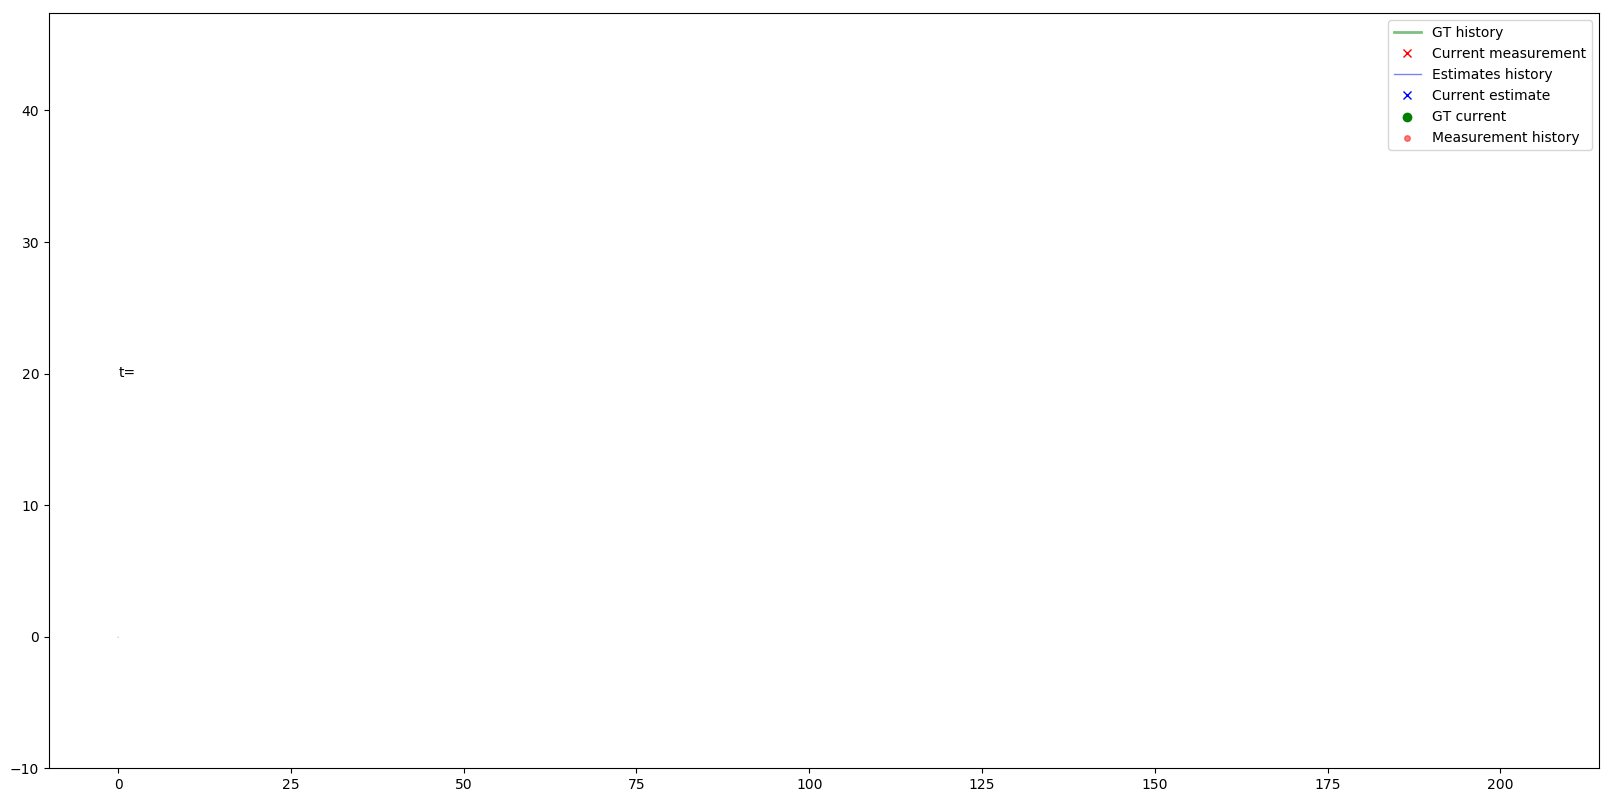

In [34]:
# First set up the figure, the axis, and the plot element we want to animate
fig = plt.figure();
padding = 10
ax = plt.axes(xlim=(min(xGT)-padding, max(xGT)+padding), ylim=(min(yGT)-padding, max(yGT)+padding));
textTime = ax.text(min(xGT), sum(yGT)/len(yGT), 't=')
lineGT, = ax.plot([], [], 'g', lw=2, alpha=0.5, label='GT history');
pointGT = ax.scatter([],[],   s=36, c='g', alpha=1,   label='GT current');
lineMES = ax.scatter([], [], s=16, c='r', alpha=0.5, label='Measurement history');
pointMES, = ax.plot([],[], 'rx', lw=7, label='Current measurement');
lineEST, = ax.plot([], [], 'b', lw=1, alpha=0.5, label='Estimates history');
pointEST, = ax.plot([],[], 'bx', lw=10, label='Current estimate');
speedGT = ax.arrow(0,0,0,0, fc='k', ec='k')
speedEST = ax.arrow(0,0,0,0, fc='m', ec='m')
confEST_pr = Ellipse(xy=[0,0], width=0, height=0, angle=0, alpha=0.7, fc='y')
confEST = Ellipse(xy=[0,0], width=0, height=0, angle=0, alpha=0.7, fc='c')
ax.legend();

In [35]:
# initialization function: plot the background of each frame
def init():
    textTime.set_text('t = ')
    lineGT.set_data([], [])
    pointGT.set_offsets([])
    lineMES.set_offsets([])
    pointMES.set_data([], [])
    lineEST.set_data([], [])
    pointEST.set_data([], [])

    global speedGT
    global speedEST
    speedGT = ax.arrow(0, 0, 0, 0)
    ax.add_patch(speedGT)
    speedEST = ax.arrow(0, 0, 0, 0)
    ax.add_patch(speedEST)
    
    global confEST_pr
    confEST_pr = Ellipse(xy=[0,0], width=0, height=0, angle=0)
    ax.add_patch(confEST_pr)
    global confEST
    confEST = Ellipse(xy=[0,0], width=0, height=0, angle=0)
    ax.add_patch(confEST)

    return textTime, lineGT, pointGT, speedGT, speedEST, confEST_pr, confEST

In [36]:
ellipse_factor = 50

In [37]:
# animation function.  This is called sequentially
def animate(i):
    textTime.set_text('t = {0:.3f}s / frame: {1}'.format(t[i], i))
    lineGT.set_data(xGT[:i], yGT[:i])
    pointGT.set_offsets([xGT[i],yGT[i]])
    lineMES.set_offsets(np.hstack((xMES[:i,np.newaxis], yMES[:i, np.newaxis])))
    pointMES.set_data(xMES[i], yMES[i])
    lineEST.set_data(xEST[:i], yEST[:i])
    pointEST.set_data(xEST[i], yEST[i])
    
    speedGT.set_xy([[xGT[i],yGT[i]],[xGT[i]+vxGT[i]/10, yGT[i]+vyGT[i]/10]])
    speedEST.set_xy([[xEST[i],yEST[i]],[xEST[i]+vxEST[i]/10, yEST[i]+vyEST[i]/10]])

    # prior uncertainty
    confEST_pr.center = (xEST[i],yEST[i])
    confEST_pr.width = sigxEST_pr[i]*ellipse_factor
    confEST_pr.height = sigyEST_pr[i]*ellipse_factor
    confEST_pr.angle = angleEST_pr[i]/math.pi*180
    # posterior uncertainty
    confEST.center = (xEST[i],yEST[i])
    confEST.width = sigxEST[i]*ellipse_factor
    confEST.height = sigyEST[i]*ellipse_factor
    confEST.angle = angleEST[i]/math.pi*180
    
    return textTime, lineGT, pointGT, lineMES, pointMES, lineEST, pointEST, speedGT, speedEST, confEST_pr, confEST

In [38]:
#N=250

In [39]:
# call the animator.  blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, 
                               animate, 
                               init_func=init,
                               frames=N, 
#                               interval=20, # delay in ms
                               blit=True)

In [40]:
%time anim.save('ukf_animation_2.mp4', fps=5, extra_args=['-vcodec', 'libx264'])

CPU times: user 18.2 s, sys: 1.17 s, total: 19.3 s
Wall time: 20 s


In [41]:
# here we can see how posterior distribution is much narrower than prior!